In [8]:
import scanpy as sc
import json

In [19]:
import scanpy as sc
import json

adata_allCT                = sc.read_h5ad("/novo/users/iwaq/multi_alt/project_allCT_1.0k/data/allCT_1.0k_grid_search_all_results_train.h5ad")
adata_GSE114412_cluster    = sc.read_h5ad("/novo/users/iwaq/multi_alt/project_GSE114412_cluster/data/GSE114412_cluster_grid_search_all_results_train.h5ad")
adata_group_5_subset_76    = sc.read_h5ad("/novo/users/iwaq/multi_alt/project_group_5_subset_76_ncells_7/data/group_5_subset_76_ncells_7_grid_search_all_results_train.h5ad")
adata_GSE114412_subcluster = sc.read_h5ad("/novo/users/iwaq/multi_alt/project_GSE114412_subcluster/data/GSE114412_subcluster_grid_search_all_results_train.h5ad")

# Store datasets in dictionary
datasets = {
    'allCT_1.0k': adata_allCT,
    'GSE114412_cluster': adata_GSE114412_cluster,
    'group_5_subset_76_ncells_7': adata_group_5_subset_76,  # Note: using full name to match path
    'GSE114412_subcluster': adata_GSE114412_subcluster,
}

# Load best configurations for each dataset
best_configs = {}

for dataset_name in datasets.keys():
    config_path = f'/novo/users/iwaq/multi_alt/project_{dataset_name}/results/best_hyperparameters.json'
    
    try:
        with open(config_path, 'r') as f:
            params = json.load(f)
        
        # Store the best configuration for this dataset
        best_configs[dataset_name] = {
            'latent_dim': params['best_denoised']['latent_dim'],
            'denoise_steps': params['best_denoised']['denoise_steps'],
            'latent_dim_pca': params['best_pca']['latent_dim']
        }
        
        
    except FileNotFoundError:
        print(f"  ✗ Configuration file not found for {dataset_name}")
    except KeyError as e:
        print(f"  ✗ Missing key in configuration: {e}")


In [20]:
import umap
import numpy as np

# Define the four methods to compare
methods = [
    'Raw data',
    'PCA',
    'VAE',
    'Denoised'
]

# Define n_neighbors for UMAP
n_neighbors = 15  # You can adjust this

# Process each dataset
for dataset_name, adata in datasets.items():
    print(f"\nProcessing dataset: {dataset_name}")
    
    # Get best configuration for this dataset
    config = best_configs[dataset_name]
    
    # Define the embeddings for each method
    embeddings_dict = {
        'Raw data': ('raw', adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X),
        'PCA': (f'pca_latent{config["latent_dim_pca"]}', 
                adata.obsm[f'X_pca_latent{config["latent_dim_pca"]}']),
        'VAE': (f'VAE_latent{config["latent_dim"]}', 
                adata.obsm[f'X_VAE_latent{config["latent_dim"]}']),
        'Denoised': (f'VAE_denoised_latent{config["latent_dim"]}_steps{config["denoise_steps"]}',
                     adata.obsm[f'X_VAE_denoised_latent{config["latent_dim"]}_steps{config["denoise_steps"]}'])
    }
    
    # Process each method
    for method_name, (key_suffix, X) in embeddings_dict.items():
        print(f"  Computing UMAP for: {method_name}")
        
        # Apply UMAP
        reducer = umap.UMAP(
            n_neighbors=n_neighbors,
            n_components=2,
            metric='euclidean',
            min_dist=0.1,
            random_state=42,
            init='spectral'
        )
        
        embedding_2d = reducer.fit_transform(X)
        
        # Save UMAP embedding to obsm
        umap_key = f'X_umap_{key_suffix}'
        adata.obsm[umap_key] = embedding_2d
        print(f"    ✓ Saved to: {umap_key}")

print("\n✓ All UMAP embeddings computed and saved!")

# Optional: Save the updated adata objects
save_updated = True  # Set to False if you don't want to overwrite
if save_updated:
    print("\nSaving updated AnnData objects...")
    for dataset_name, adata in datasets.items():
        output_path = f"/novo/users/iwaq/multi_alt/project_{dataset_name}/data/{dataset_name}_with_umaps.h5ad"
        adata.write_h5ad(output_path)
        print(f"  ✓ Saved: {output_path}")


Processing dataset: allCT_1.0k
  Computing UMAP for: Raw data


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_raw
  Computing UMAP for: PCA


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    ✓ Saved to: X_umap_pca_latent50
  Computing UMAP for: VAE


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_latent50
  Computing UMAP for: Denoised


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_denoised_latent50_steps10

Processing dataset: GSE114412_cluster
  Computing UMAP for: Raw data


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_raw
  Computing UMAP for: PCA


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_pca_latent20
  Computing UMAP for: VAE


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_latent10
  Computing UMAP for: Denoised


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_denoised_latent10_steps20

Processing dataset: group_5_subset_76_ncells_7
  Computing UMAP for: Raw data


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_raw
  Computing UMAP for: PCA


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_pca_latent10
  Computing UMAP for: VAE


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_latent30
  Computing UMAP for: Denoised


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_denoised_latent30_steps20

Processing dataset: GSE114412_subcluster
  Computing UMAP for: Raw data


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_raw
  Computing UMAP for: PCA


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_pca_latent20
  Computing UMAP for: VAE


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_latent10
  Computing UMAP for: Denoised


/novo/users/iwaq/.conda/envs/myenv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    ✓ Saved to: X_umap_VAE_denoised_latent10_steps40

✓ All UMAP embeddings computed and saved!

Saving updated AnnData objects...
  ✓ Saved: /novo/users/iwaq/multi_alt/project_allCT_1.0k/data/allCT_1.0k_with_umaps.h5ad
  ✓ Saved: /novo/users/iwaq/multi_alt/project_GSE114412_cluster/data/GSE114412_cluster_with_umaps.h5ad
  ✓ Saved: /novo/users/iwaq/multi_alt/project_group_5_subset_76_ncells_7/data/group_5_subset_76_ncells_7_with_umaps.h5ad
  ✓ Saved: /novo/users/iwaq/multi_alt/project_GSE114412_subcluster/data/GSE114412_subcluster_with_umaps.h5ad



Plotting method: HVG
  Plotting dataset: allCT_1.0k
  Plotting dataset: group_5_subset_76_ncells_7
  Plotting dataset: GSE114412_cluster
  Plotting dataset: GSE114412_subcluster

Plotting method: PCA
  Plotting dataset: allCT_1.0k
  Plotting dataset: group_5_subset_76_ncells_7
  Plotting dataset: GSE114412_cluster
  Plotting dataset: GSE114412_subcluster

Plotting method: VAE
  Plotting dataset: allCT_1.0k
  Plotting dataset: group_5_subset_76_ncells_7
  Plotting dataset: GSE114412_cluster
  Plotting dataset: GSE114412_subcluster

Plotting method: Denoised
  Plotting dataset: allCT_1.0k
  Plotting dataset: group_5_subset_76_ncells_7
  Plotting dataset: GSE114412_cluster
  Plotting dataset: GSE114412_subcluster

✓ Figure saved to: /novo/users/iwaq/figures/umap_comparison_4x4.png


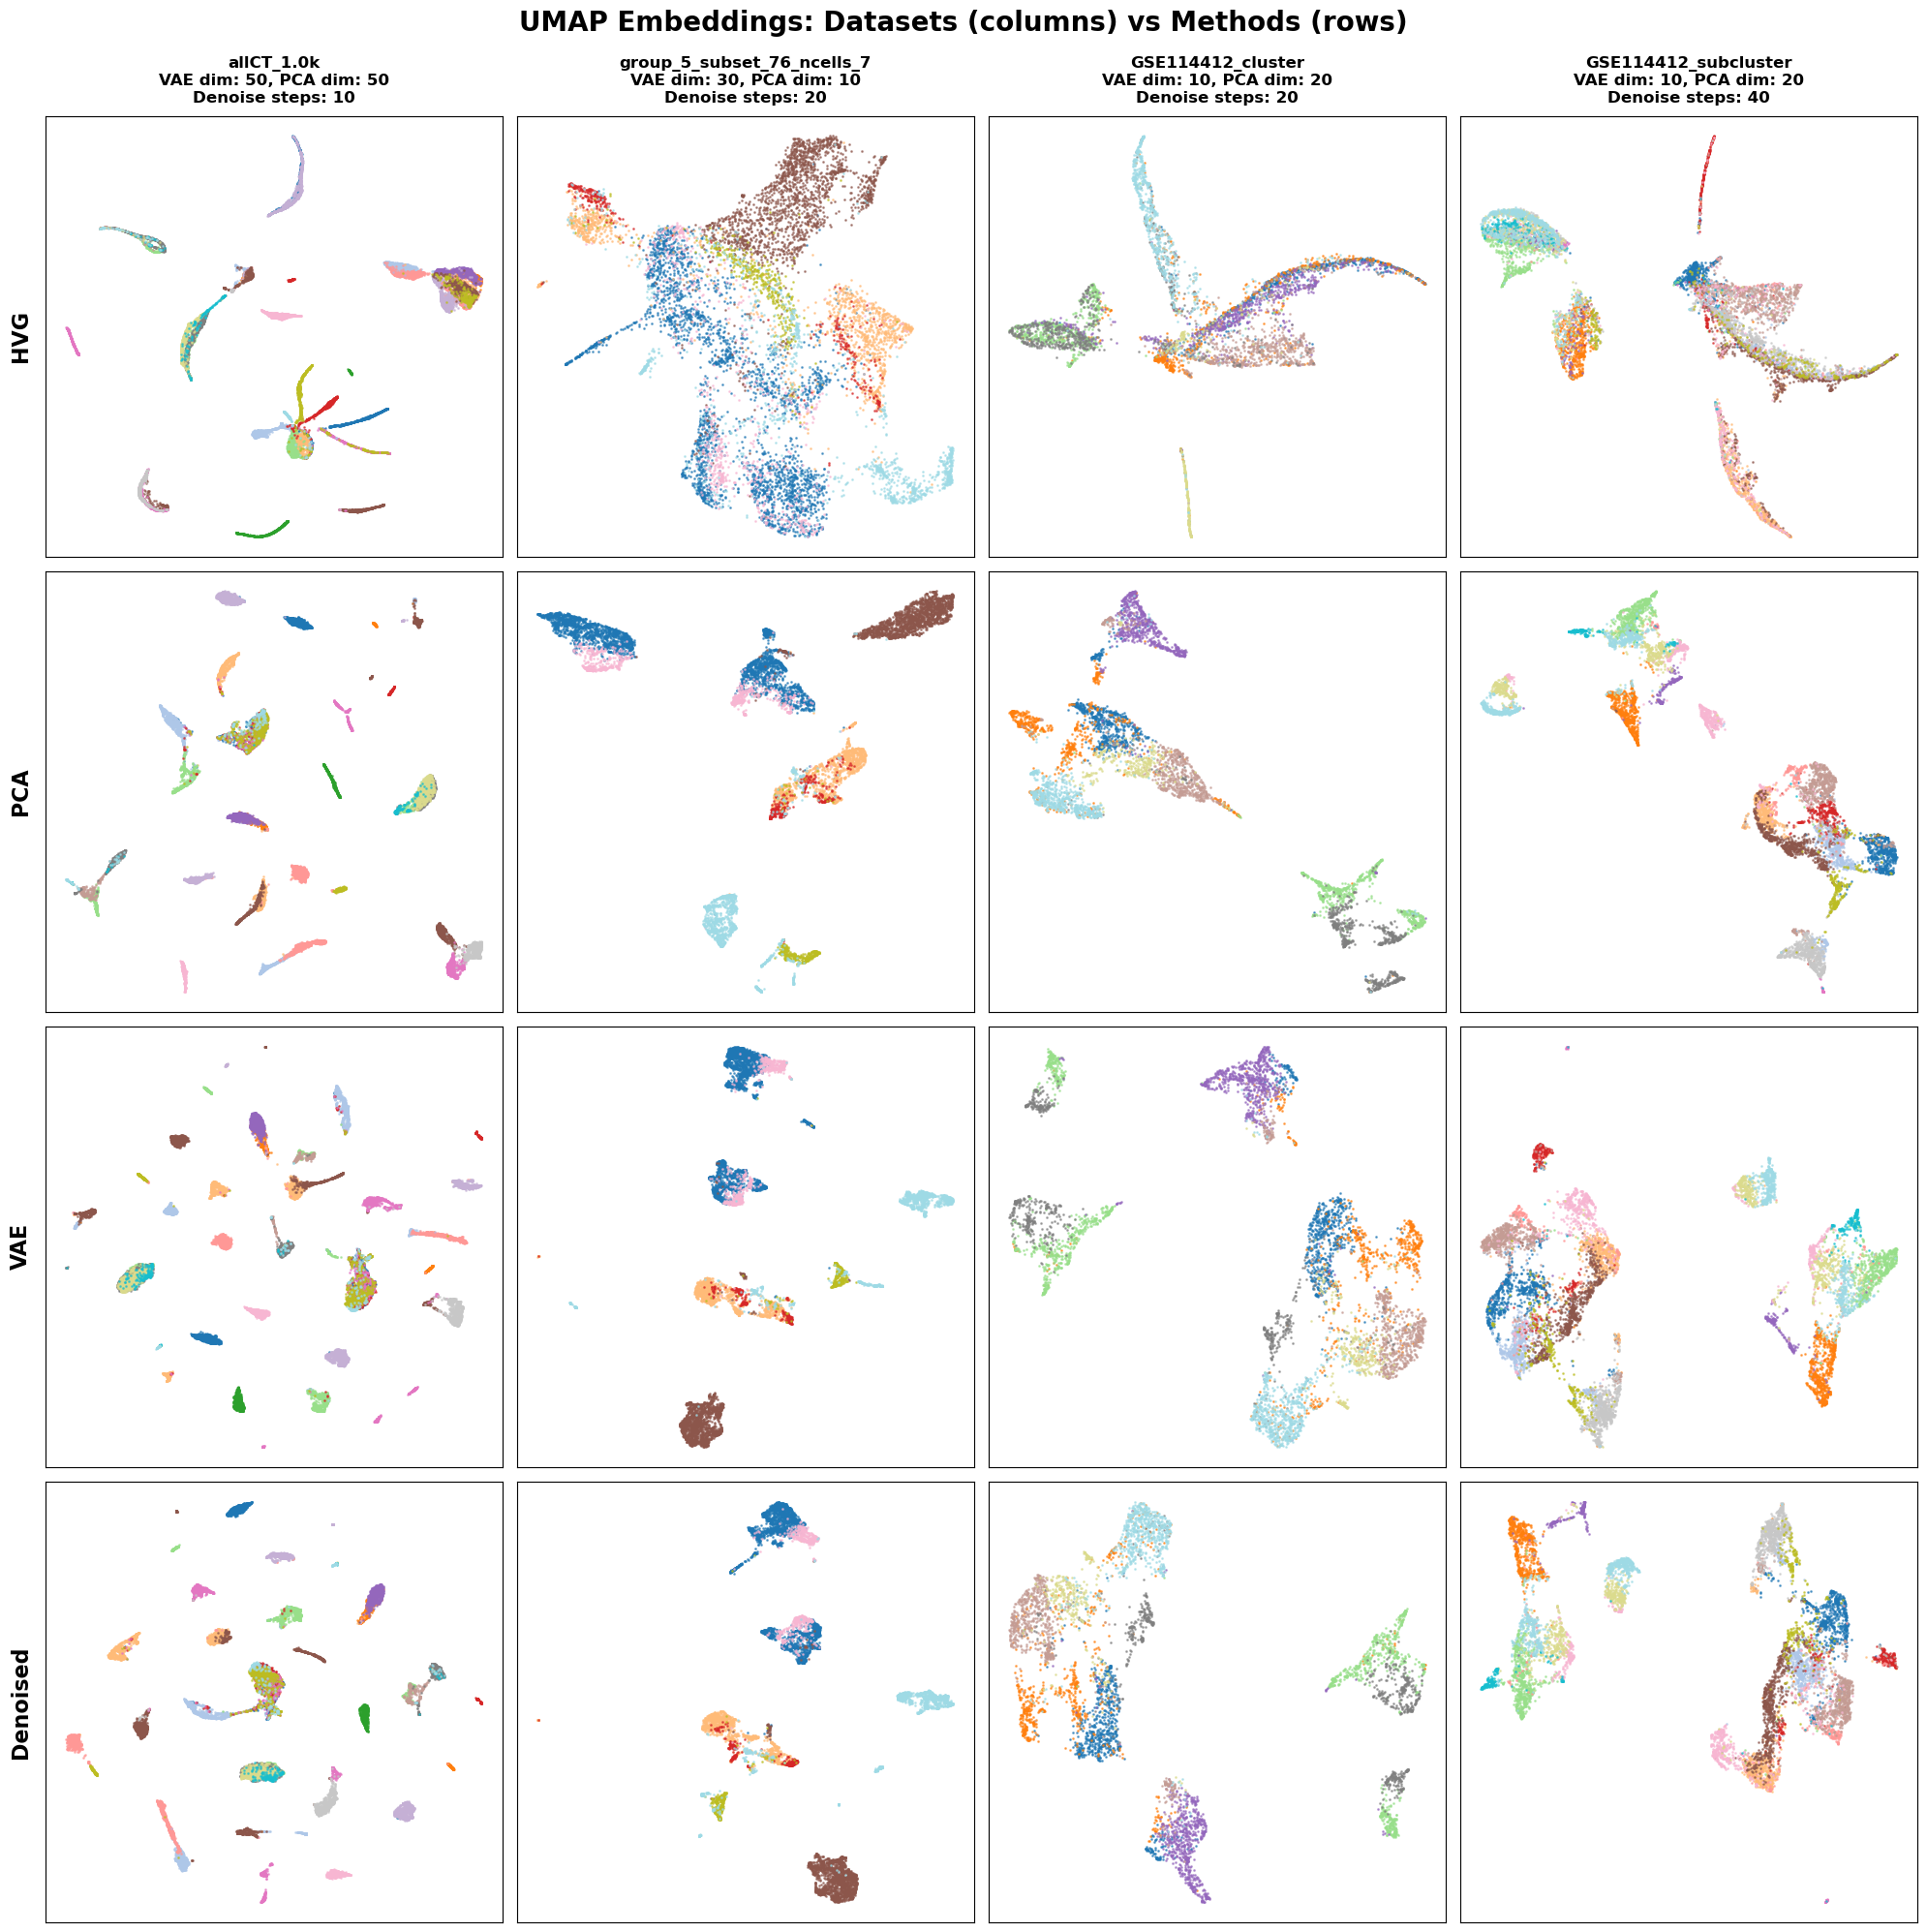

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define methods and their corresponding UMAP keys
methods = ['HVG', 'PCA', 'VAE', 'Denoised']

# Function to get UMAP key for each method
def get_umap_key(dataset_name, method):
    config = best_configs[dataset_name]
    if method == 'HVG':
        return 'X_umap_raw'
    elif method == 'PCA':
        return f'X_umap_pca_latent{config["latent_dim_pca"]}'
    elif method == 'VAE':
        return f'X_umap_VAE_latent{config["latent_dim"]}'
    elif method == 'Denoised':
        return f'X_umap_VAE_denoised_latent{config["latent_dim"]}_steps{config["denoise_steps"]}'

# Cell type column name - adjust this to match your data
cell_type_column = 'cell_type'  # Change to 'celltype', 'cluster', etc. if needed

# Reorder datasets to put GSE datasets together
dataset_names_ordered = [
    'allCT_1.0k',
    'group_5_subset_76_ncells_7',
    'GSE114412_cluster',
    'GSE114412_subcluster'
]

# Create ordered datasets dictionary
datasets_ordered = {name: datasets[name] for name in dataset_names_ordered}

# Create figure with 4x4 subplots (rows=methods, columns=datasets)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('UMAP Embeddings: Datasets (columns) vs Methods (rows)',
             fontsize=20, y=0.995, fontweight='bold')

# Process each method (rows)
for i, method in enumerate(methods):
    print(f"\nPlotting method: {method}")
    
    # Process each dataset (columns)
    for j, (dataset_name, adata) in enumerate(datasets_ordered.items()):
        print(f"  Plotting dataset: {dataset_name}")
        ax = axes[i, j]
        
        # Get configuration for this dataset
        config = best_configs[dataset_name]
        
        # Check if cell type information exists
        has_cell_types = cell_type_column in adata.obs.columns
        
        if has_cell_types:
            cell_types = adata.obs[cell_type_column]
            unique_types = cell_types.unique()
            colors = plt.cm.tab20(np.linspace(0, 1, len(unique_types)))
        
        # Get UMAP embedding
        umap_key = get_umap_key(dataset_name, method)
        embedding_2d = adata.obsm[umap_key]
        
        # Plot
        if has_cell_types:
            for idx, ct in enumerate(unique_types):
                mask = cell_types == ct
                ax.scatter(embedding_2d[mask, 0],
                          embedding_2d[mask, 1],
                          c=[colors[idx]],
                          label=ct,
                          s=1,
                          alpha=0.6,
                          rasterized=True)
        else:
            ax.scatter(embedding_2d[:, 0],
                      embedding_2d[:, 1],
                      s=1,
                      alpha=0.6,
                      c='blue',
                      rasterized=True)
        
        # Formatting
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add column titles on first row (dataset names with config info)
        if i == 0:
            title_text = f"{dataset_name}\nVAE dim: {config['latent_dim']}, PCA dim: {config['latent_dim_pca']}\nDenoise steps: {config['denoise_steps']}"
            ax.set_title(title_text, fontsize=12, fontweight='bold', pad=10)
        
        # Add row labels on first column (method names)
        if j == 0:
            ax.set_ylabel(method, fontsize=16, fontweight='bold', rotation=90, labelpad=10)
        
        # Add grid
        ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Save figure
output_path = '/novo/users/iwaq/figures/umap_comparison_4x4.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✓ Figure saved to: {output_path}")

plt.show()